<a href="https://colab.research.google.com/github/mayank-liv/Winter_practice_ML/blob/master/Image2_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files


In [5]:
files.upload()

Saving Image2.txt to Image2.txt


{'Image2.txt': b'-2.4271,-2.0659,1\n-3.2354,-4.1332,1\n-1.8513,-4.6596,1\n-2.1312,-2.387,1\n-2.1173,-3.5059,1\n-2.9967,-1.2599,1\n-1.5744,-2.7401,1\n-1.841,-5.0802,1\n-2.6782,-4.3189,1\n-2.6284,-4.3253,1\n-1.3993,-3.2755,1\n-1.8237,-1.3892,1\n-1.5456,-2.9884,1\n-1.8227,-2.5522,1\n-1.9804,-3.0228,1\n-1.7608,-2.4722,1\n-1.8002,-2.352,1\n-2.7063,-1.8567,1\n-3.6932,-1.7306,1\n-1.8459,-1.9379,1\n-2.7822,-3.5539,1\n-1.1992,-3.5572,1\n-2.8116,-3.601,1\n-2.0179,-2.3276,1\n-2.777,-1.855,1\n-3.5049,-3.5301,1\n-1.1068,-2.2991,1\n-0.18713,-1.9935,1\n-2.3289,-3.7898,1\n-2.0454,-2.2659,1\n-3.4336,-2.8857,1\n-2.3548,-3.1685,1\n-2.5306,-2.9825,1\n-0.42125,-1.8875,1\n-2.34,-2.553,1\n-1.7583,-3.2186,1\n-1.9822,-4.6149,1\n-2.2585,-0.77962,1\n-1.4715,-2.4456,1\n-2.2376,-3.6631,1\n-2.3076,-2.2719,1\n0.18783,-3.5563,1\n-3.5063,-4.0098,1\n-0.70169,-3.068,1\n-1.5142,-1.2546,1\n-3.622,-5.3364,1\n-1.8132,-1.9474,1\n-2.0999,-0.72758,1\n-2.1749,-3.2117,1\n-2.7886,-1.8912,1\n-2.3333,-2.7828,1\n1.091,-2.5775,1\n-2.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv('Image2.txt', header=None)

In [8]:
data.head


<bound method NDFrame.head of             0        1  2
0    -2.42710  -2.0659  1
1    -3.23540  -4.1332  1
2    -1.85130  -4.6596  1
3    -2.13120  -2.3870  1
4    -2.11730  -3.5059  1
5    -2.99670  -1.2599  1
6    -1.57440  -2.7401  1
7    -1.84100  -5.0802  1
8    -2.67820  -4.3189  1
9    -2.62840  -4.3253  1
10   -1.39930  -3.2755  1
11   -1.82370  -1.3892  1
12   -1.54560  -2.9884  1
13   -1.82270  -2.5522  1
14   -1.98040  -3.0228  1
15   -1.76080  -2.4722  1
16   -1.80020  -2.3520  1
17   -2.70630  -1.8567  1
18   -3.69320  -1.7306  1
19   -1.84590  -1.9379  1
20   -2.78220  -3.5539  1
21   -1.19920  -3.5572  1
22   -2.81160  -3.6010  1
23   -2.01790  -2.3276  1
24   -2.77700  -1.8550  1
25   -3.50490  -3.5301  1
26   -1.10680  -2.2991  1
27   -0.18713  -1.9935  1
28   -2.32890  -3.7898  1
29   -2.04540  -2.2659  1
...       ...      ... ..
9970  4.12830   3.9931  2
9971  3.94990   8.0380  2
9972  6.07560   6.9770  2
9973  3.59870   7.8971  2
9974  6.58510   2.6661  2
9975  4.

In [0]:
col_name=['x','y','label']
data.columns=col_name

In [0]:
data.drop('label', inplace=True, axis=1)

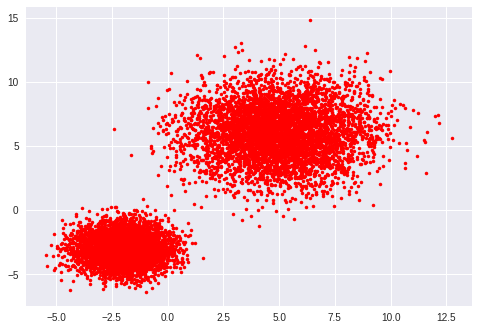

In [11]:
plt.plot(data.x, data.y, 'r.')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(data.x,data.y, test_size=0.33, random_state= 42)

In [13]:
data.corr()

,x,y
x,1.000000,0.859103
y,0.859103,1.000000


In [0]:
def Cost(x, theta, y):
  return ((np.dot(x, theta)-y)**2).mean()/2

def lineplot(x, theta, y):
  y_val=np.dot(x, theta)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.plot(x,y,'g.',x, y_val, 'r-')
  plt.show()

def lineplot_test(x, theta, y):
  y_val=np.dot(x, theta)
  plt.xlabel('X_test')
  plt.ylabel('Y_test')
  plt.plot(x,y,'g.',x, y_val, 'r-')
  plt.show()
  

def G_descent_lin_reg(alpha=0.03,iter=10000):
  theta0=[]
  theta1=[]
  cost=[]
  A=X_train

  X = np.column_stack((np.ones(len(A)),A))
  Y=Y_train
  theta=np.zeros(2)
  
  
  for i in range(iter):
    pred=np.dot(X,theta)
    t0=theta[0]-alpha*(pred-Y).mean()
    t1=theta[1]-alpha*((pred-Y)*X[:,1]).mean()
    theta=np.array([t0,t1])
    J=Cost(X,theta,Y)
    theta0.append(t0)
    theta1.append(t1)
    cost.append(J)
    if i%1000==0:
      print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
      lineplot(X,theta,Y)
 
  X_changed=np.column_stack((np.ones(len(X_test)),X_test))
  predicted_values=np.dot(X_changed, theta)
  
  lineplot_test(X_changed,theta, Y_test)
 
 

Iteration: 1,Cost = 5.2722859150986014,theta = [0.04648947 0.54320076]


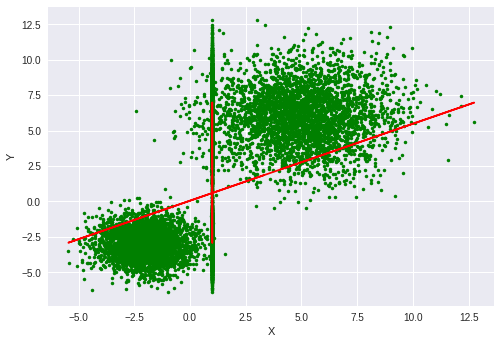

Iteration: 1001,Cost = 3.0036480180160336,theta = [-0.08004837  1.0697377 ]


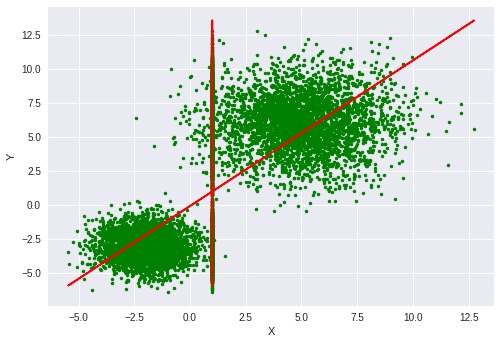

Iteration: 2001,Cost = 3.0036480180160336,theta = [-0.08004837  1.0697377 ]


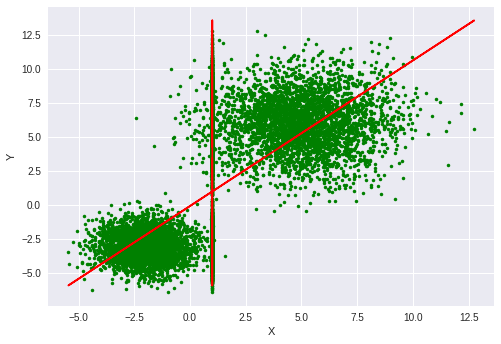

Iteration: 3001,Cost = 3.0036480180160336,theta = [-0.08004837  1.0697377 ]


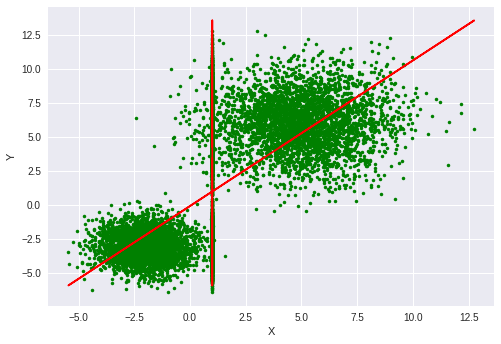

Iteration: 4001,Cost = 3.0036480180160336,theta = [-0.08004837  1.0697377 ]


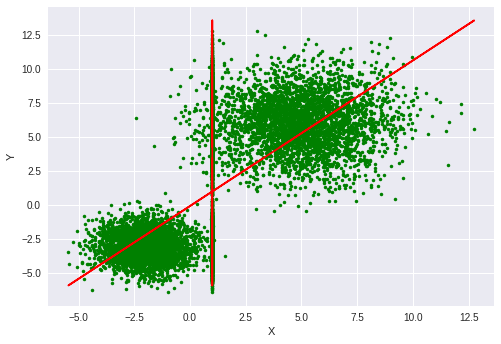

Iteration: 5001,Cost = 3.0036480180160336,theta = [-0.08004837  1.0697377 ]


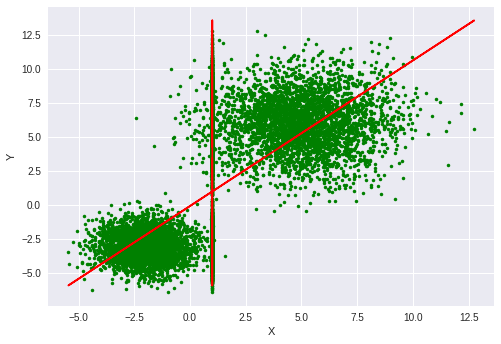

Iteration: 6001,Cost = 3.0036480180160336,theta = [-0.08004837  1.0697377 ]


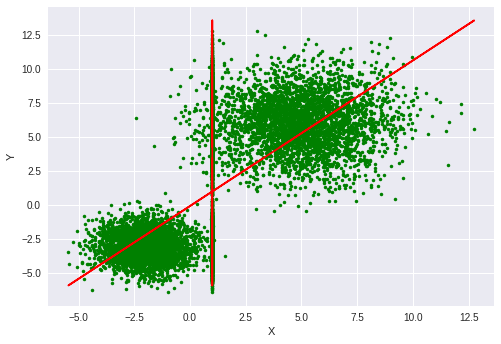

Iteration: 7001,Cost = 3.0036480180160336,theta = [-0.08004837  1.0697377 ]


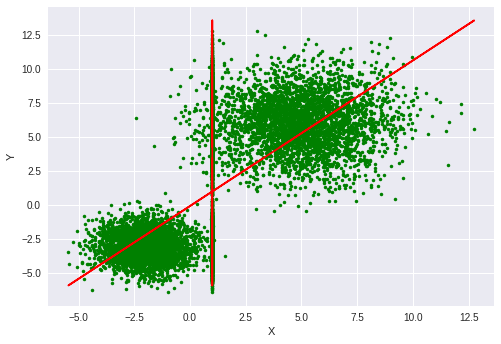

Iteration: 8001,Cost = 3.0036480180160336,theta = [-0.08004837  1.0697377 ]


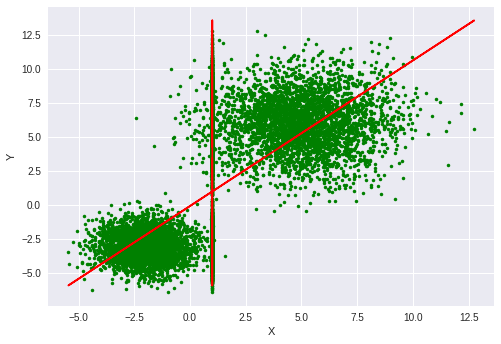

Iteration: 9001,Cost = 3.0036480180160336,theta = [-0.08004837  1.0697377 ]


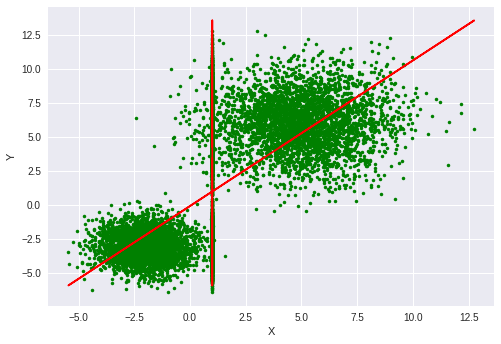

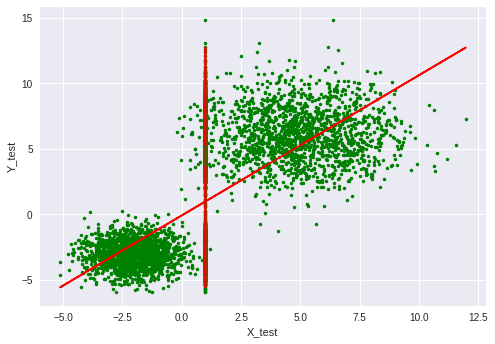

In [22]:
 G_descent_lin_reg()